# Antarctic Winds and Sea Ice

#### Overview
In this notebook, we will start looking at ways to analyze ocean model data. As in previous lessons, we will use output from the ECCO Ocean State Estimate (Version 4).

#### Import Modules
First, import the modules required to access data from netCDF files and create plots:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean.cm as cm
import moviepy.video.io.ImageSequenceClip

To begin, make a blank plot of the world and draw the surface winds in the southern hemisphere predicted by the three cell atmospheric circulation model.

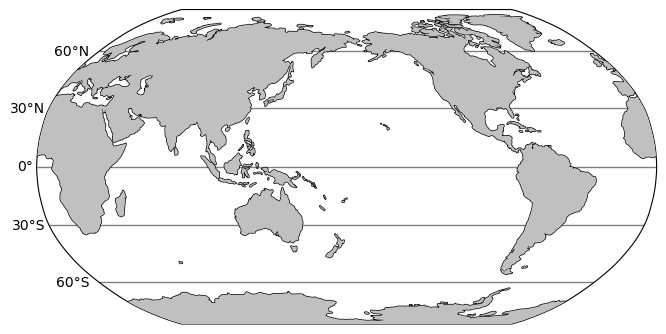

In [2]:
import matplotlib.ticker as mticker

# make a figure object with projection
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator([])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
# format the axes
plt.show()

Next, create the same plot the view the winds in the southern hemisphere.

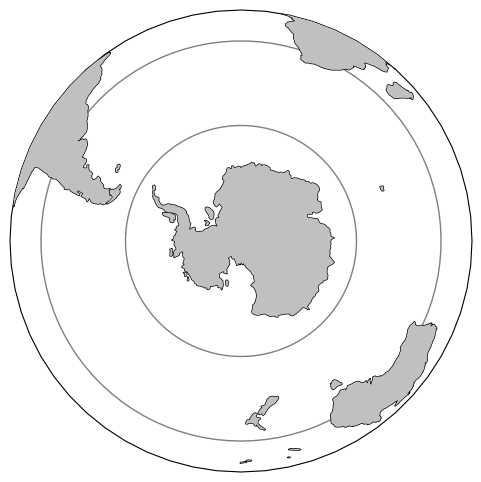

In [4]:
import matplotlib.ticker as mticker

# make a figure object with projection
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude=-90))

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator([])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
# format the axes
plt.show()

Finally, let's read in some sea ice data to plot it on our map:

In [5]:
# Define a path to a data folder
data_folder = ''

# identify path to the data file
month_file = os.path.join(data_folder,'ECCO','Version4','Release4',
                        'interp_monthly','SIarea','SIarea_2015_09.nc')

# read in the data 
ds = xr.open_dataset(month_file)
longitude = np.array(ds['longitude'][:])
latitude = np.array(ds['latitude'][:])
SIarea = np.array(ds['SIarea'][:])
ds.close()

# take the first time step
SIarea = SIarea[0, :, :]

Now that we've got our sea ice data, let's add it to the plot:

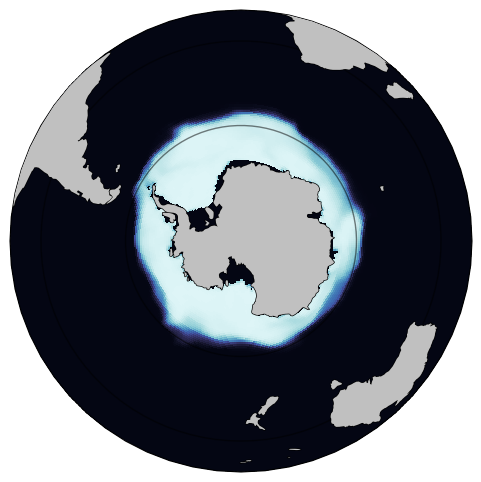

In [8]:
import matplotlib.ticker as mticker

# make a figure object with projection
fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection=ccrs.Orthographic(central_latitude = -90))

# add the sea ice data
plt.pcolormesh(longitude, latitude, SIarea, cmap=cm.ice,
               vmin =0, vmax=1, transform = ccrs.PlateCarree())

# add coastlines
plt.gca().add_feature(cfeature.LAND, zorder=99, facecolor='silver')
plt.gca().coastlines()

# add grid lines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='k', alpha=0.5, linestyle='-')
gl.xlocator = mticker.FixedLocator([])
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
# format the axes
plt.show()

### &#x1F914; Questions for consideration
1. What direction is the wind flowing at the sea ice edge
2. What direction are the surface currents moving at the sea ice edge?
3. What will effect does this have on sea ice area?